In [7]:
import pandas as pd
import jinja2


In [8]:
dataset=pd.read_csv('Archivo data - 2022.csv')
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,30,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,1020,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,60,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,1350,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,60,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,720,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,2160,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,330,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,120,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [9]:
dataset.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [10]:
train_data=dataset.sample(frac=0.90,random_state=345)
test_data=dataset.drop(train_data.index)
train_data.reset_index(inplace=True,drop=True)
test_data.reset_index(inplace=True,drop=True)

In [11]:
#print the number of word and column of the new data set
print('Data used to train the model has ' +str(train_data.shape[0])+' rows and '+str(train_data.shape[1])+' columns')
print('unseen Data used test for making predictions or classifications has ' +str(test_data.shape[0])+' rows and '+str(test_data.shape[1])+' columns')

Data used to train the model has 6339 rows and 21 columns
unseen Data used test for making predictions or classifications has 704 rows and 21 columns


In [12]:
from pycaret.classification import *
s = setup(data = train_data, target= 'Churn',  fold_shuffle=True, session_id=345)

,Description,Value
0,session_id,345
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(6339, 21)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [13]:
model= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8048,0.8514,0.5209,0.6832,0.5899,0.4651,0.4731,2.4360
gbc,Gradient Boosting Classifier,0.8028,0.8504,0.5234,0.6762,0.5887,0.4620,0.4693,2.5520
ada,Ada Boost Classifier,0.7994,0.8485,0.5543,0.6519,0.5984,0.4660,0.4692,1.3700
lr,Logistic Regression,0.7976,0.8448,0.5534,0.6483,0.5963,0.4625,0.4656,9.6970
lightgbm,Light Gradient Boosting Machine,0.7913,0.8345,0.5400,0.6343,0.5826,0.4448,0.4478,0.2290
rf,Random Forest Classifier,0.7904,0.8363,0.4758,0.6554,0.5508,0.4186,0.4280,0.9890
ridge,Ridge Classifier,0.7854,0.0000,0.4491,0.6518,0.5297,0.3971,0.4098,7.8480
et,Extra Trees Classifier,0.7816,0.8249,0.4624,0.6317,0.5333,0.3953,0.4039,1.7370
xgboost,Extreme Gradient Boosting,0.7780,0.8194,0.5108,0.6059,0.5531,0.4072,0.4105,6.1600
knn,K Neighbors Classifier,0.7647,0.7582,0.4824,0.5777,0.5247,0.3703,0.3735,0.5760


In [ ]:
#create random forest model
forest= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7815,0.8140,0.5000,0.6186,0.5530,0.4106,0.4146
1,0.7905,0.8254,0.4750,0.6552,0.5507,0.4187,0.4279
2,0.8198,0.8823,0.5417,0.7222,0.6190,0.5042,0.5131
3,0.7950,0.8271,0.4500,0.6835,0.5427,0.4178,0.4329
4,0.7995,0.8593,0.4917,0.6782,0.5700,0.4437,0.4534
5,0.7928,0.8365,0.4667,0.6667,0.5490,0.4199,0.4312
6,0.7793,0.8219,0.4417,0.6310,0.5196,0.3821,0.3923
7,0.7675,0.8208,0.4622,0.5851,0.5164,0.3661,0.3706
8,0.8059,0.8564,0.4706,0.7089,0.5657,0.4471,0.4627
9,0.7720,0.8190,0.4583,0.6044,0.5213,0.3754,0.3816


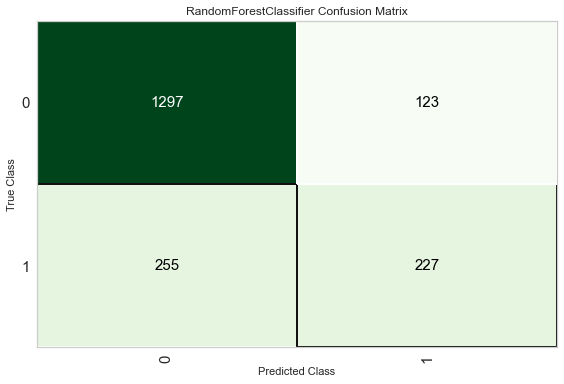

In [ ]:
#plot the confusion matrix
plot_model(forest,plot='confusion_matrix')

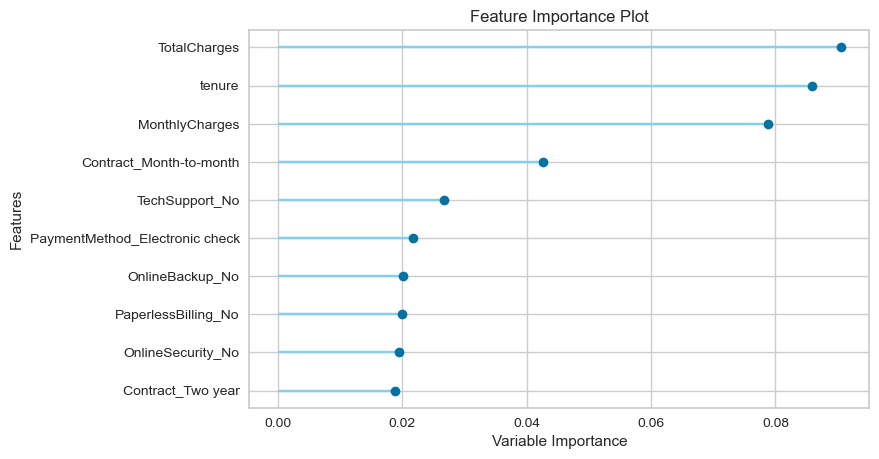

In [ ]:
#plot the feature importance
plot_model(forest,plot='feature')

In [ ]:
#evaluate the model
evaluate_model(forest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#show the models predictions on the test data
predictions = predict_model(forest, data= test_data)
predictions .head(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Label,Score
0,9237-HQITU,Female,0,No,No,60,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Yes,0.55
1,7469-LKBCI,Male,0,No,No,480,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No,No,0.98
2,5248-YGIJN,Male,0,Yes,No,2160,Yes,Yes,DSL,Yes,...,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No,No,1.00
3,6047-YHPVI,Male,0,No,No,150,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes,Yes,0.63
4,5380-WJKOV,Male,0,No,No,1020,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,Yes,Yes,0.64
5,4667-QONEA,Female,1,Yes,Yes,1800,Yes,No,DSL,Yes,...,No,Yes,One year,Yes,Credit card (automatic),74.85,4456.35,No,No,0.95
6,7410-OIEDU,Male,0,No,No,300,Yes,No,Fiber optic,Yes,...,No,No,Month-to-month,Yes,Mailed check,79.85,887.35,No,No,0.66
7,2673-CXQEU,Female,1,No,No,1680,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,One year,No,Electronic check,110.50,6139.50,No,No,0.68


In [ ]:
save_model(forest, 'Random Forest Model')

AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [ ]:
#load the saved model
saved_forest=load_model('Random Forest Model')

Transformation Pipeline and Model Successfully Loaded


FileNotFoundError: [Errno 2] No such file or directory: 'Random Forest Model.pkl'

In [ ]:
#make a predictions / classification using the saved model
saved_model_prediction=predict_model(saved_forest,data=test_data)
saved_model_prediction.head(8)

NameError: name 'saved_forest' is not defined